In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import imdb
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense   
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
import keras
from keras.datasets import imdb
(x_train,y_train), (x_test,y_test)=imdb.load_data(num_words=12000)

In [4]:
#Check shape

x_train.shape, x_test.shape, type(x_train)

((25000,), (25000,), numpy.ndarray)

In [5]:
# each review simply contains a list of integers, where each integer corresponds to a word in a dictionary
x_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,

In [6]:
# save coppy of data

xtrain = x_train
xtest = x_test

In [7]:
# Get word indices accessable through the imdb object

word_index = imdb.get_word_index()

# Make a dictionary using the word index for decoding reviews

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
# Make a function which uses the dictionary for decoding reviews
# Agruments accept review index and data split (train/test)


def decode_review(n, split='train'):  
    
    # Adjust decoding by 3 positions, as positions 0, 1, and 2 are reserved
    
    if split=='train':
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in xtrain[n]])
        
    elif split == 'test':
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in xtest[n]])
        
    # Return decoded string
    
    return decoded_review

In [9]:
print('Traning label:',y_train[6])
decode_review(6, split='train'), 

Traning label: 1


("? lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in ? 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results",)

In [10]:
def vectorize_features(features):
    #Define the number of total words in our corpus
    #make an empty 2D tensor of shape (25000, 12000) (samples, unique words in one-hot)
    dimension=12000
    review_vectors=np.zeros((len(features), dimension))
    #interate over each review
    #set the indices of our empty tensor to 1s
    for location, feature in enumerate(features):
        review_vectors[location, feature]=1
    return review_vectors
x_train = vectorize_features(x_train)
x_test = vectorize_features(x_test)

In [11]:
# computers process better vectorize data
y_train= np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [12]:
model=Sequential()
model.add(Dense(6, activation='relu', input_shape=(12000,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# loss = root mean square error
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72006     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 72,055
Trainable params: 72,055
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Define early stopping callback to monitor validation loss
# the training stops once the val_loss starts to increase 
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')

In [16]:
# the model.fit function returns a History object, to be used in keras callbacks
network_metadata=model.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 epochs=20,
 batch_size=100, callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 261us/step - loss: 0.4645 - acc: 0.8230 - val_loss: 0.3447 - val_acc: 0.8879
Epoch 2/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.2424 - acc: 0.9203 - val_loss: 0.2884 - val_acc: 0.8872
Epoch 3/20
25000/25000 [==============================] - 5s 207us/step - loss: 0.1787 - acc: 0.9382 - val_loss: 0.2914 - val_acc: 0.8853


### The Early Stopping Callback
This callback allows us
to monitor a specific training metric. Our choices are between our accuracy or loss on the 
training set or on the validation set, which are all stored in a dictionary pertaining to our
model's history

In [17]:
history_dict = network_metadata.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
# Shows training loss for each epoch trained
history_dict['loss']

[0.4645482162237167, 0.2423559060692787, 0.17865809699892998]

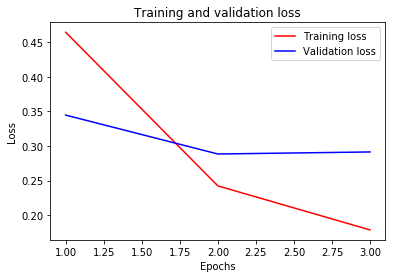

In [19]:
#Plot training and validation loss to spot overfitting

acc = history_dict['acc']                                        
loss_values = history_dict['loss']                               
val_loss_values = history_dict['val_loss']                       
epochs = range(1, len(acc) + 1)                                  


plt.plot(epochs, loss_values, 'r', label='Training loss')        
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  
plt.title('Training and validation loss')                       
plt.xlabel('Epochs')                                             
plt.ylabel('Loss')                                               
plt.legend()                                                     
plt.show()  

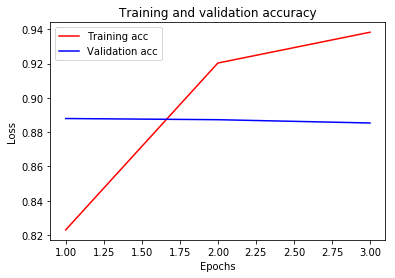

In [20]:
#Now plot training accuracy

plt.clf()                                                                   

acc_values = history_dict['acc']                                            
val_acc_values = history_dict['val_acc']                                    


plt.plot(epochs, history_dict.get('acc'), 'r', label='Training acc')        
plt.plot(epochs, history_dict.get('val_acc'), 'b', label='Validation acc')  


plt.title('Training and validation accuracy')                               
plt.xlabel('Epochs')                                                        
plt.ylabel('Loss')                                                          
plt.legend()                                                                
plt.show()  

In [21]:
# Make prediction on the test set 

predictions = model.predict([x_test])

# Check a prediction of the model
predictions[5]

array([0.84969336], dtype=float32)

In [22]:
# Print label, and decode review no. 6

y_test[5], decode_review(5,split='test')

(1.0,
 "? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap download it deserves the real thing i'm them now this movie will be on dvd")

In [25]:
# Make helper function to gauge network's predictions between some simple thresholds

def gauge_predictions(n):    
    if (predictions[n] <= 0.4) and (y_test[n]==0):
        print(f'Network correctly predicts that review {n} is negative')
        
    elif (predictions[n] <= 0.4) and (y_test[n]==1):
        print(f'Network falsely predicts that review {n} is negative')
        
    elif (predictions[n] >= 0.7) and (y_test[n]==1):
        print(f'Network correctly predicts that review {n}  is positive')
        
    elif (predictions[n] >= 0.7) and (y_test[n]==0):
        print(f'Network falsely predicts that review {n}  is positive')
        
    else:
        print(f'Network is not so sure. Review no. {n} has a probability score of {predictions[n]}')
        

In [27]:
# Make halper function which uses both the gauging function and the decoding function
# Returns network's prediction as well as decoded version of review

def verify_predictions(n):    
    return gauge_predictions(n), predictions[n], decode_review(n,split='test')

In [32]:
verify_predictions(47)

Network correctly predicts that review 47 is negative


(None,
 array([9.825275e-05], dtype=float32),
 "? house of the damned also known as ? is one of your low budget haunted house horror flicks filled with mediocre performances and cheap effects it is about a family that ? an old irish mansion and after moving in begin to experience strange phenomenon and ghostly ? including the ghost of a young girl who was murdered and buried within a wall in the ? basement the ? young daughter is then ? away into some other dimension and they seek help from a group of ? ? for help br br the ideas this film borrowed from the 1982 haunted house film ? are obvious i will say that this movie does have some slightly creepy sequences but it is sometimes very very boring the acting here is nothing special the mood is alright the score which was mostly this dramatic irish opera music was somewhat annoying and the cgi special effects are really horrible i mean it was 1996 you would think they could have done a little better than they did the ending where the ho